In [1]:
from tensorflow.keras.layers import Dense, Flatten,Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

import tensorflow as tf

In [2]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
model = Sequential()

model.add(Conv2D(2,(3,3), activation='relu', input_shape=(408,615,3)))
model.add(MaxPooling2D( pool_size = (2,2) ))


model.add(Conv2D(4,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D( pool_size = (2,2) ))


model.add(Conv2D(8,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D( pool_size = (2,2) ))


model.add(Conv2D(16,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D( pool_size = (2,2) ))


model.add(Conv2D(32, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(64, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(128, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(256, (3, 3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Flatten())
model.add(Dense(units=408, activation='relu'))
model.add(Dense(units=4, activation='sigmoid'))


model.compile(optimizer = "Adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])





train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('J:/KJSCE_MP/Backup]/MiniProject/dataset/train',target_size = (408,615),batch_size = 64, class_mode = 'categorical')
valid_set = test_datagen.flow_from_directory('J:/KJSCE_MP/Backup]/MiniProject/dataset/val', target_size = (408,615), batch_size = 64, class_mode = 'categorical')

labels = (training_set.class_indices)
print(labels)


hist = model.fit(training_set, steps_per_epoch = 30, epochs = 45, validation_data=valid_set)

Found 3488 images belonging to 4 classes.
Found 686 images belonging to 4 classes.
{'Maize - Blight': 0, 'Maize - Common_Rust': 1, 'Maize - Gray_Leaf_Spot': 2, 'Maize - Healthy': 3}
Epoch 1/45
30/30 [==============================] - 234s 8s/step - loss: 1.2842 - accuracy: 0.3978 - val_loss: 1.4109 - val_accuracy: 0.3761
Epoch 2/45
30/30 [==============================] - 218s 7s/step - loss: 1.1749 - accuracy: 0.4793 - val_loss: 1.3502 - val_accuracy: 0.4271
Epoch 3/45
30/30 [==============================] - 214s 7s/step - loss: 1.1084 - accuracy: 0.5135 - val_loss: 1.2055 - val_accuracy: 0.4752
Epoch 4/45
30/30 [==============================] - 202s 7s/step - loss: 1.0338 - accuracy: 0.5689 - val_loss: 1.1721 - val_accuracy: 0.4534
Epoch 5/45
30/30 [==============================] - 207s 7s/step - loss: 0.9257 - accuracy: 0.6165 - val_loss: 1.0432 - val_accuracy: 0.5262
Epoch 6/45
30/30 [==============================] - 199s 6s/step - loss: 0.7816 - accuracy: 0.6969 - val_loss: 1.

In [16]:
img = "J:/KJSCE_MP/Backup]/FinalBuildv2.0/dataset/val/Maize - Common_Rust/Corn_Common_Rust (829).JPG"

test_img = load_img(img, target_size=(408,615))




from PIL import Image 

im = Image.open(img)
im.show()



test_img = img_to_array(test_img)/255
test_img = np.expand_dims(test_img, axis = 0)


result = model.predict(test_img)

pred = np.argmax(result, axis=1)
print(pred)

1/1 [==============================] - 0s 61ms/step
[1]


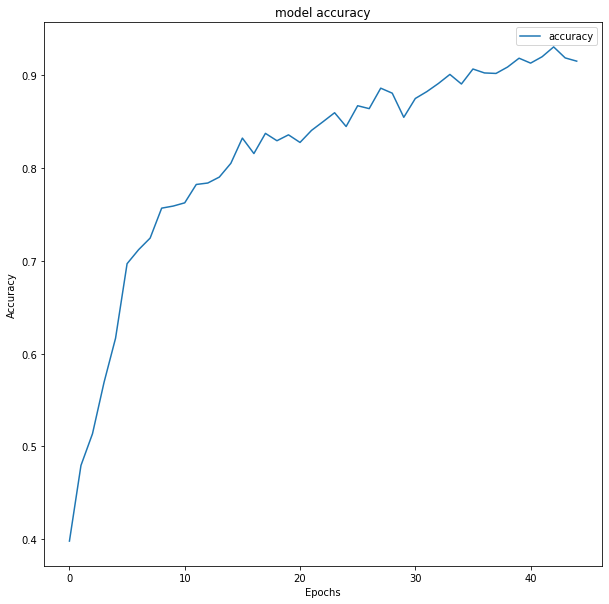

In [17]:
plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["accuracy"])
plt.show()

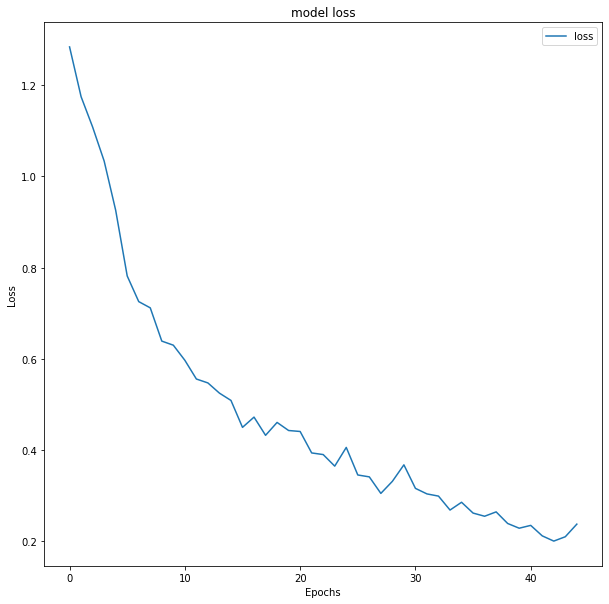

In [18]:
plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["loss","Validation Loss"])
plt.show()

In [19]:
hist.history

{'loss': [1.2842237949371338,
  1.1749398708343506,
  1.108415961265564,
  1.0337920188903809,
  0.9257317781448364,
  0.7816029191017151,
  0.7252800464630127,
  0.7115970253944397,
  0.6386480331420898,
  0.6296852231025696,
  0.5965598225593567,
  0.5554597973823547,
  0.5468578338623047,
  0.524457573890686,
  0.5084375739097595,
  0.4493452310562134,
  0.4718756675720215,
  0.43190062046051025,
  0.46018272638320923,
  0.44245296716690063,
  0.44032400846481323,
  0.39323797821998596,
  0.3896474838256836,
  0.3642932176589966,
  0.4053252041339874,
  0.34487617015838623,
  0.34069982171058655,
  0.3044552206993103,
  0.3309193253517151,
  0.36713075637817383,
  0.31547731161117554,
  0.303329199552536,
  0.2985082268714905,
  0.2678966224193573,
  0.28498533368110657,
  0.2612752616405487,
  0.2543063759803772,
  0.2638927102088928,
  0.23844841122627258,
  0.22804923355579376,
  0.2342720478773117,
  0.21123985946178436,
  0.1997913122177124,
  0.20934653282165527,
  0.237007036

'''Saving Model'''

In [20]:
model.save('J:/KJSCE_MP/Backup]/FinalBuildv2.0/backend_model.h5')

In [21]:
path="J:/KJSCE_MP/Backup]/FinalBuildv2.0/backend_model.h5"
model1 = tf.keras.models.load_model(path)

In [22]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 406, 613, 2)       56        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 203, 306, 2)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 203, 306, 4)       76        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 101, 153, 4)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 101, 153, 8)       296       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 76, 8)        0

In [23]:
classifier_json=model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
    model.save_weights("my_model_weights.h5")
    model.save("model.h5")
    print("Saved model to disk")

Saved model to disk
